In [1]:
from model.dcgan import DCGAN
from model.anogan import AnoGAN

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Conv2D, LeakyReLU, Flatten, Dense, Reshape, Conv2DTranspose, Input, MaxPool2D, UpSampling2D, BatchNormalization, Activation, Dropout, ZeroPadding2D
%matplotlib inline

In [2]:
EPOCHS = 100
NOISE_DIM = 100

In [3]:
TRAIN_PATH = r"C:\Users\filip\Desktop\Universita\Laboratorio di Intelligenza Artificiale\hazelnut\train"
TEST_PATH = r"C:\Users\filip\Desktop\Universita\Laboratorio di Intelligenza Artificiale\hazelnut\test"
training_set = tf.keras.utils.image_dataset_from_directory(TRAIN_PATH, image_size = (64, 64), batch_size = 17)
test_set = tf.keras.utils.image_dataset_from_directory(TEST_PATH, image_size = (64, 64))

normalization_layer = tf.keras.layers.Rescaling(scale = (1./127.5), offset = -1)

normalized_training_set = training_set.map(lambda x, y: (normalization_layer(x), y))
normalized_test_set = test_set.map(lambda x, y: (normalization_layer(x), y))

Found 391 files belonging to 1 classes.
Found 110 files belonging to 5 classes.


In [4]:
gan = DCGAN()

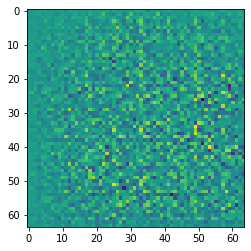

In [5]:
img = gan.generator(tf.random.normal([1,100]))

plt.imshow(img[0, :, :, 0])
plt.show()

In [6]:
print(gan.discriminator(img))

tf.Tensor([[-0.00045376]], shape=(1, 1), dtype=float32)


In [20]:
#Train
gan.restore()
disc_loss, gen_loss = gan.train(normalized_training_set, EPOCHS)

Epoch 1  -  Generator Loss: 3.246	Discriminator Loss: 0.408
Epoch 2  -  Generator Loss: 3.633	Discriminator Loss: 0.312
Epoch 3  -  Generator Loss: 3.684	Discriminator Loss: 0.251
Epoch 4  -  Generator Loss: 3.771	Discriminator Loss: 0.270
Epoch 5  -  Generator Loss: 3.912	Discriminator Loss: 0.239
Epoch 6  -  Generator Loss: 3.822	Discriminator Loss: 0.325
Epoch 7  -  Generator Loss: 3.672	Discriminator Loss: 0.271
Epoch 8  -  Generator Loss: 3.821	Discriminator Loss: 0.262
Epoch 9  -  Generator Loss: 3.900	Discriminator Loss: 0.321
Epoch 10  -  Generator Loss: 3.963	Discriminator Loss: 0.285
Epoch 11  -  Generator Loss: 4.056	Discriminator Loss: 0.286
Epoch 12  -  Generator Loss: 3.837	Discriminator Loss: 0.347
Epoch 13  -  Generator Loss: 4.499	Discriminator Loss: 0.187
Epoch 14  -  Generator Loss: 3.869	Discriminator Loss: 0.255
Epoch 15  -  Generator Loss: 3.865	Discriminator Loss: 0.347
Epoch 16  -  Generator Loss: 4.253	Discriminator Loss: 0.244
Epoch 17  -  Generator Loss: 3.76

In [7]:
gan.restore()

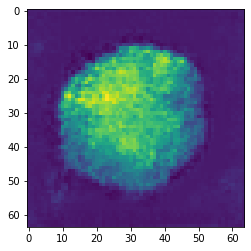

In [8]:
generated_img = gan.generator(tf.random.normal([1, 100]))
plt.imshow(generated_img[0, :, :, 0])
plt.show()

In [9]:
plt.plot(disc_loss)
plt.plot(gen_loss)
plt.show()

NameError: name 'disc_loss' is not defined

In [10]:
anogan = AnoGAN(gan)

In [11]:
test_image = []
for images, labels in normalized_test_set:
    for i in range(1):
        test_image = images[i].numpy()
    break
test_image = np.array([test_image])
anomaly_score, similar_img = anogan.compute_anomaly_score(test_image)

1/1 [==============================] - 0s 171ms/step


In [12]:
print(anomaly_score)

2394.130126953125


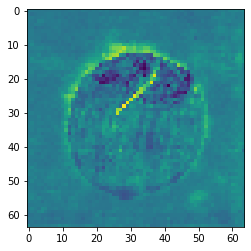

In [17]:
plt.imshow(similar_img[0, :, :, 0] - test_image[0, :, :, 0])